# 使用osmnx从openstreetmap获取shp文件

In [1]:
import osmnx as ox
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11dev'

# 获取一个城市的shp文件，进行投影、可视化并保存

In [2]:
# 通过地名，创建一个地理数据库包含该地点的几何形状
city = ox.gdf_from_place('Shanghai, China')
type(city['geometry'].iloc[0])

shapely.geometry.point.Point

很明显，查询结果geometry是一个节点，不是我想要的的结果。这是因为which_result默认为1，返回查询到的第一个结果。很明显第一个结果对应的是节点坐标。第二结果对应的是边界list。给出如下解决方法



way1.传递一个结构化的字典给query参数

way2.令which_result=2,计想要的结果的序号


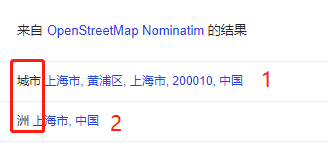

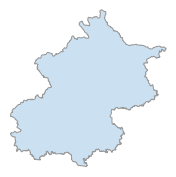

In [3]:
# way1 结构化的字典
place = {
    'state':'Beijing',
    'country':'China'
}
city = ox.gdf_from_place(place) 
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(3,3))

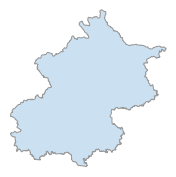

In [4]:
# way2 确定结果序号
place = 'Beijing, China'
city = ox.gdf_from_place(place,which_result=2) 
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(3,3))

In [5]:
# 将检索数据凌春伟shp文件
ox.save_load.save_gdf_shapefile(city)

# 获取多个城市的shp文件，进行投影、可视化并保存

In [6]:
# 定义一个城市列表
place_names= ['Beijing,China',
               'Tianjin,China',
              'Langfang,Hebei,China']
which_results=[2]*len(place_names)
place_names

['Beijing,China', 'Tianjin,China', 'Langfang,Hebei,China']

In [7]:
# 创建一个地理信息表格将列表内的每一地点保存在每一行中
JJJ = ox.gdf_from_places(queries=place_names,which_results=which_results,gdf_name='YRD_cities')
JJJ

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,117.507985,41.059558,39.441611,115.417209,"POLYGON ((115.41721 39.96842, 115.42060 39.964...","Beijing, China"
1,118.060000,40.252011,38.554953,116.702201,"POLYGON ((116.70220 38.89622, 116.71650 38.896...","Tianjin, China"
2,117.253735,40.083674,38.472836,116.110956,"MULTIPOLYGON (((116.11096 39.37142, 116.11196 ...","Langfang City, Hebei, China"


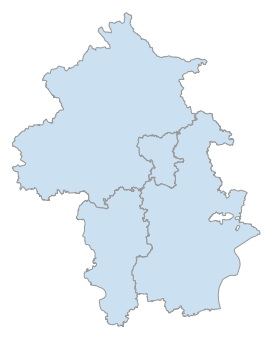

In [8]:
# 将城市群投影到UTM,并展示
JJJ= ox.project_gdf(JJJ)
fig, ax = ox.plot_shape(JJJ)


In [9]:
# 保存到shp中
ox.save_gdf_shapefile(JJJ)

# 我们还可以构建缓冲区下载文件

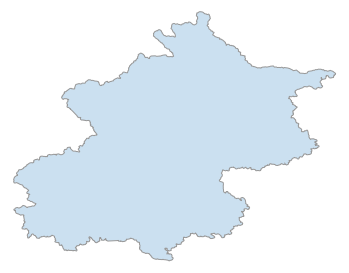

In [10]:
# 以米为单位进行缓冲下载
city_buffered = ox.gdf_from_place('Beijing, CN',which_result=2, buffer_dist=250)
fig, ax = ox.plot_shape(city_buffered)


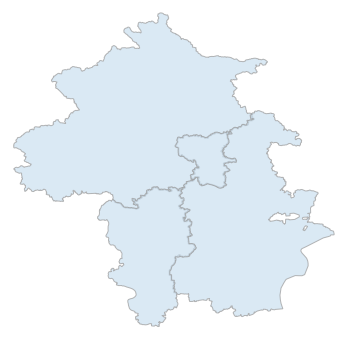

In [11]:
# 还可以使用一个查询下载多个地区
JJJ_buffered = ox.gdf_from_places(place_names,which_results=which_results ,gdf_name='JJJ', buffer_dist=250)
fig, ax = ox.plot_shape(JJJ_buffered, alpha=0.7)


# 我们还可以下载市，区县，省会和国家等


注意，多边形几何代表政治边界，而不是物理/土地边界。

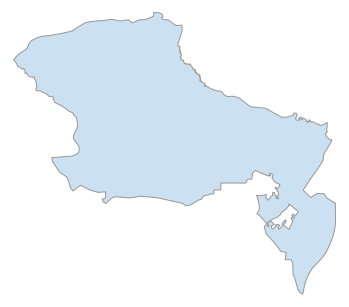

In [12]:
# 区县
gdf = ox.gdf_from_place('Shushan District,Hefei,Anhui,China')
gdf = ox.project_gdf(gdf)
fig, ax = ox.plot_shape(gdf)

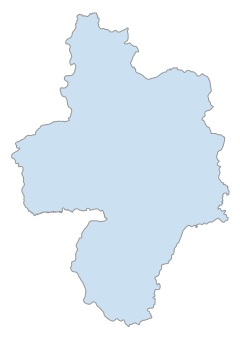

In [13]:
# 市
gdf = ox.gdf_from_place('Hefei,Anhui,China',)
gdf = ox.project_gdf(gdf)
fig, ax = ox.plot_shape(gdf)

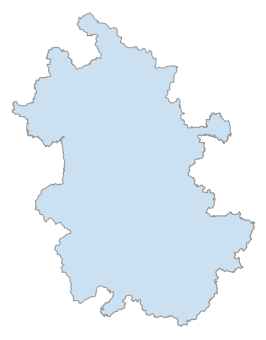

In [14]:
# 省
gdf = ox.gdf_from_place('Anhui,China',)
gdf = ox.project_gdf(gdf)
fig, ax = ox.plot_shape(gdf)

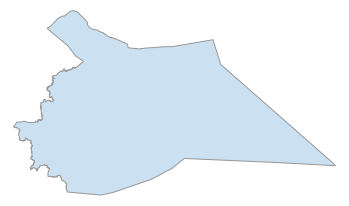

In [15]:
# 直辖市
gdf = ox.gdf_from_place('Shanghai, China',which_result=2)
gdf = ox.project_gdf(gdf)
fig, ax = ox.plot_shape(gdf)

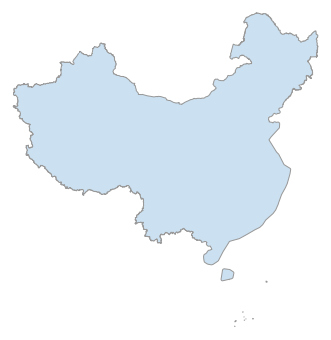

In [16]:
# 国家
gdf = ox.gdf_from_place('China',)
gdf = ox.project_gdf(gdf)
fig, ax = ox.plot_shape(gdf)

# 我们可以通过序号获取特定结果

默认情况下，我们仅向OSM请求1个结果。但是，我们可以传递一个可选的which结果参数来查询OSM以获取n *个结果，然后处理/返回
*其他如果查询“法国”，OSM将返回其所有海外领土为结果2的国家，仅欧洲法国为结果1。查询“法国”仅返回第一个结果（欧洲法国），但传递的是result = 2则返回OSM排名前2位，并且处理/返回第2位（法国的所有海外地区）。
您也可以这样做来检索该国家（而不是上面的墨西哥城）所在的墨西哥。

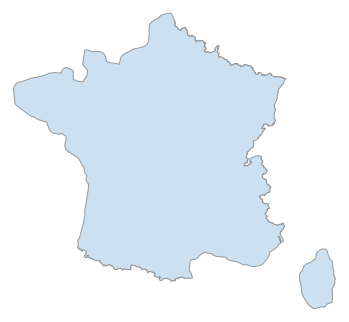

In [17]:
france = ox.gdf_from_place('France', which_result=2)
france = ox.project_gdf(france)
fig, ax = ox.plot_shape(france)

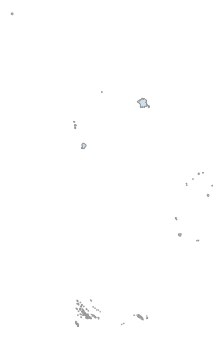

In [18]:
france = ox.gdf_from_place('France')
france = ox.project_gdf(france)
fig, ax = ox.plot_shape(france)